In [152]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [153]:
sends_df= pd.read_csv("sends.csv", date_parser=True)
users_df = pd.read_csv("User info.csv")
events_df= pd.read_csv("events.txt", sep='\t')

In [154]:
sends_df['send_dt'] = pd.to_datetime(sends_df['send_dt'])
users_df['aq_dt'] = pd.to_datetime(users_df['aq_dt'])
events_df['event_captured_dt']= pd.to_datetime(events_df['event_captured_dt'])

In [155]:
new_df= pd.merge(sends_df,users_df,on=['riid'])
new_df['tenure']= (new_df['send_dt']-new_df['aq_dt']).dt.days
new_df['aq_year']= new_df['aq_dt'].dt.year
new_df['aq_month']= new_df['aq_dt'].dt.month
new_df['aq_day']= new_df['aq_dt'].dt.day
new_df['sub_source']=new_df['sub_source'].fillna('Unknown')

In [159]:
new_df.head()

,riid,launch_id,opened,send_dt,aq_dt,sub_source,tenure,aq_year,aq_month,aq_day
0,605591962,784382,0,2017-07-14,2015-10-29,Unknown,624,2015,10,29
1,181990762,422482,0,2016-07-11,2014-12-08,Unknown,581,2014,12,8
2,88630922,468302,0,2016-09-07,2010-09-26,Retail B&M,2173,2010,9,26
3,259205742,529502,0,2016-11-25,2015-04-14,Online Purchase,591,2015,4,14
4,172633782,558762,0,2017-01-17,2014-06-19,Retail B&M,943,2014,6,19


In [160]:
bins= [0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750]
group_names=['1','2','3','4','5','6','7','8','9','10','11']

new_df['tenure_label']= pd.cut(new_df['tenure'],bins, labels=group_names)

In [161]:
new_df.head()

,riid,launch_id,opened,send_dt,aq_dt,sub_source,tenure,aq_year,aq_month,aq_day,tenure_label
0,605591962,784382,0,2017-07-14,2015-10-29,Unknown,624,2015,10,29,3
1,181990762,422482,0,2016-07-11,2014-12-08,Unknown,581,2014,12,8,3
2,88630922,468302,0,2016-09-07,2010-09-26,Retail B&M,2173,2010,9,26,9
3,259205742,529502,0,2016-11-25,2015-04-14,Online Purchase,591,2015,4,14,3
4,172633782,558762,0,2017-01-17,2014-06-19,Retail B&M,943,2014,6,19,4


## Assignment Questions

In [162]:
sends_df.head()

,riid,launch_id,opened,send_dt
0,605591962,784382,0,2017-07-14
1,181990762,422482,0,2016-07-11
2,88630922,468302,0,2016-09-07
3,259205742,529502,0,2016-11-25
4,172633782,558762,0,2017-01-17


In [163]:
# Q1. What is the aggregate open rate for the sample provided in the "Sends"Table?

Total_Opens= sends_df['opened'].sum()
Total_Sends = len(sends_df['opened'])

Aggregate_Open_Rate = Total_Opens*100/Total_Sends

print (" Aggregate Open Rate is : ", Aggregate_Open_Rate)

 Aggregate Open Rate is :  15.295


In [164]:
new_df.head()

,riid,launch_id,opened,send_dt,aq_dt,sub_source,tenure,aq_year,aq_month,aq_day,tenure_label
0,605591962,784382,0,2017-07-14,2015-10-29,Unknown,624,2015,10,29,3
1,181990762,422482,0,2016-07-11,2014-12-08,Unknown,581,2014,12,8,3
2,88630922,468302,0,2016-09-07,2010-09-26,Retail B&M,2173,2010,9,26,9
3,259205742,529502,0,2016-11-25,2015-04-14,Online Purchase,591,2015,4,14,3
4,172633782,558762,0,2017-01-17,2014-06-19,Retail B&M,943,2014,6,19,4


In [165]:
# Q2.1.A Calculate the open rate at the granularity of launch_id
Total_Opens= new_df.groupby(['launch_id'])['opened'].sum()
Total_Sends = new_df.groupby(['launch_id'])['opened'].count()

Aggregate_Open_Rate = Total_Opens*100/Total_Sends

print (" Aggregate Open Rate is:\n", Aggregate_Open_Rate)
Aggregate_Open_Rate.to_csv("aggOpenRate_launchId.csv")

 Aggregate Open Rate is:
 launch_id
422482    14.095941
435222    15.384615
446722    12.981132
457862    15.228758
468302     9.700094
478342    20.065789
478382     8.213820
478422     7.744875
486182    23.636364
486442     8.547009
486462     5.629139
503362    22.977346
503382    10.332951
509322    16.970999
509362    25.882353
509382    17.910448
525622    27.777778
525642    11.059294
529482     9.920635
529502    20.305344
537282    23.845007
537302     9.450679
549762    25.617284
549782    17.604618
558762    10.520231
558782    21.105528
570642    18.750000
578522    20.168856
589662    12.588652
589682    17.733090
601102    24.251497
601122     8.701473
623862    25.611746
642742    21.734234
660762    21.272555
684802    17.837838
708722    17.977528
708742    19.047619
737882    14.930114
738662    14.942529
752462    18.720602
784382    13.685524
Name: opened, dtype: float64


In [166]:
# Q2.1.B Calculate the count of customers at the granularity of launch_id

Count_of_Customers = new_df.groupby(['launch_id'])['riid'].count()
print (" No. of Customers per launch id is:\n", Count_of_Customers)
Count_of_Customers.to_csv("cnt_cust_launchId.csv")

 No. of Customers per launch id is:
 launch_id
422482    1355
435222    1430
446722    1325
457862    1530
468302    2134
478342     608
478382     767
478422     439
486182     605
486442     936
486462     302
503362     618
503382     871
509322     931
509362      85
509382      67
525622     630
525642    1501
529482    1512
529502     655
537282     671
537302    1693
549762     648
549782     693
558762     865
558782     597
570642     832
578522    1066
589662     564
589682     547
601102     668
601122    2241
623862     613
642742     888
660762    1053
684802    1480
708722     534
708742     483
737882    1574
738662     522
752462    1063
784382    2404
Name: riid, dtype: int64


In [167]:
# Q2.2.A Calculate the open rate at the granularity of User Sub Source
Total_Opens= new_df.groupby(['sub_source'])['opened'].sum()
Total_Sends = new_df.groupby(['sub_source'])['opened'].count()

Aggregate_Open_Rate = Total_Opens*100/Total_Sends

print (" Aggregate Open Rate is:\n", Aggregate_Open_Rate)
Aggregate_Open_Rate.to_csv("aggOpenRate_sub_source.csv")

 Aggregate Open Rate is:
 sub_source
Online Purchase       19.450535
Online Sale Access    18.051576
Online Subscribe      14.920205
Retail B&M            15.071433
Social                11.877395
Sports/Brand          23.255814
Unknown               12.533896
Name: opened, dtype: float64


In [168]:
# Q2.2.B Calculate the count of customers at the granularity of User sub source

Count_of_Customers = new_df.groupby(['sub_source'])['riid'].count()
print (" No. of Customers per launch id is:\n", Count_of_Customers)
Count_of_Customers.to_csv("cnt_cust_sub_source.csv")

 No. of Customers per launch id is:
 sub_source
Online Purchase        7753
Online Sale Access      349
Online Subscribe       6642
Retail B&M            14909
Social                  261
Sports/Brand            129
Unknown                9957
Name: riid, dtype: int64


In [169]:
# Q2.3.A Calculate the open rate at the granularity of User Month of Acquisition
Total_Opens= new_df.groupby(['aq_month'])['opened'].sum()
Total_Sends = new_df.groupby(['aq_month'])['opened'].count()

Aggregate_Open_Rate = Total_Opens*100/Total_Sends

print (" Aggregate Open Rate is:\n", Aggregate_Open_Rate)
Aggregate_Open_Rate.to_csv("aggOpenRate_aq_month.csv")

 Aggregate Open Rate is:
 aq_month
1     16.984479
2     15.619048
3     16.522574
4     16.211485
5     15.369328
6     10.388464
7     16.797900
8     17.271835
9     16.673614
10    16.479783
11    16.326531
12    15.053415
Name: opened, dtype: float64


In [170]:
# Q2.3.B Calculate the count of customers at the granularity of User Month of acquisition

Count_of_Customers = new_df.groupby(['aq_month'])['riid'].count()
print (" No. of Customers per launch id is:\n", Count_of_Customers)
Count_of_Customers.to_csv("cnt_cust_aq_month.csv")

 No. of Customers per launch id is:
 aq_month
1     2255
2     2100
3     4164
4     2856
5     3019
6     6796
7     2667
8     3057
9     2399
10    2943
11    4655
12    3089
Name: riid, dtype: int64


In [178]:
# Q3. Relationship between a customer's propensity to open an email v/s their Tenure

# Checking if there is any correlation between opened and tenure
new_df[["opened","tenure"]].corr()

,opened,tenure
opened,1.000000,0.009078
tenure,0.009078,1.000000


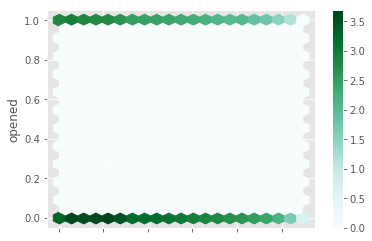

In [191]:
new_df.plot(kind="hexbin", x="tenure", y="opened", gridsize=20, bins='log') 

In [193]:
#new_df[new_df["opened"]==0].plot(kind="hexbin", x="tenure", y="opened", gridsize=20) # reduce_C_function=fn)

In [192]:
#new_df[new_df["opened"]==0].plot(kind="hexbin", x="tenure", y="opened", gridsize=20, bins='log') # reduce_C_function=fn)

In [172]:


tenure_open= new_df[['tenure','opened']]
tenure_open.to_csv("tenure_open.csv")

Total_Opens= new_df.groupby(['tenure_label'])['opened'].sum()
Total_Sends = new_df.groupby(['tenure_label'])['opened'].count()

OpenRate_per250days = Total_Opens*100/Total_Sends

# Each index is corresponding to 250 days..Increase in index corresponding distant time in the past
print (" Customer Propensity to open an email is:\n", OpenRate_per250days)

 Customer Propensity to open an email is:
 tenure_label
1     18.665691
2     12.930429
3     11.999499
4     13.577422
5     16.057954
6     17.469880
7     18.443627
8     17.927632
9     19.683258
10    16.860465
11    20.224719
Name: opened, dtype: float64


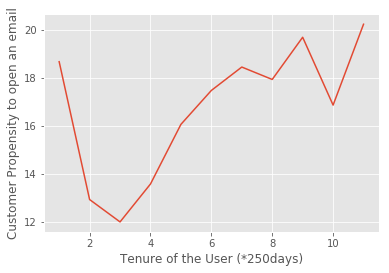

In [173]:
plt.plot(group_names, OpenRate_per250days)
plt.xlabel('Tenure of the User (*250days)')
plt.ylabel('Customer Propensity to open an email')
plt.savefig('custPropensity_Tenure.png')